# CMPE 257 Homework 2

## Question 1

### a. Load dataset from csv file.

Note: Please load the dataset from the URL as shown in the demo 

In [608]:
import pandas as pd
data = pd.read_csv('datasetHW2.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### b. Remove the header which is 0th row.

In [609]:
#I am not sure what question means.
# if it means remove 0th sample data, like this:
data = data.iloc[1:,:]
data.reset_index(inplace=True, drop=True)


'''
else it means remove column names such as longitude, 
we can simply use header option like this: 

    data = pd.read_csv('datasetHW2.csv', header=None)
    
or

    data.columns = [''] * len(data.columns)

'''

"\nelse it means remove column names such as longitude, \nwe can simply use header option like this: \n\n    data = pd.read_csv('datasetHW2.csv', header=None)\n    \nor\n\n    data.columns = [''] * len(data.columns)\n\n"

### c. Split the dataset into 70:30 training set and test set (non-repetitive random selection).

In [611]:
data = data.copy()
'''
count_nan = data.ocean_proximity.isnull().sum() or data.info()
print ('Count of NaN: ' + str(count_nan))
'''
# before split data,
# categorical data changes to numerical data.
from sklearn.preprocessing import LabelEncoder
LabelEncoder_X= LabelEncoder()
data['ocean_proximity'] = LabelEncoder_X.fit_transform(data['ocean_proximity'])
# or we can use "map" as well, but we have to check unique categoric values by using groupby function.
# group_name = data.groupby('ocean_proximity').nunique() 
# print (group_name)
# data.ocean_proximity = data.ocean_proximity.map({'NEAR BAY':1, 'INLAND':2, 'NEAR OCEAN':3, '<1H OCEAN':4, 'ISLAND':5})

# None value changes to default value or mean value, or remove rows having none values.
# I am filled in mean value()
# data["total_bedrooms"].fillna(data["total_bedrooms"].mean(), inplace=True)
# or
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data["total_bedrooms"] = imputer.fit_transform(data["total_bedrooms"].values.reshape((-1,1)))

# SPLIT
data = data[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","ocean_proximity","median_house_value"]]
x = data.iloc[:, :-1]
y = data.iloc[:, -1:] # target = median_house_value

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,358500.0
1,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3,352100.0
2,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,341300.0
3,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,342200.0
4,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,3,269700.0
...,...,...,...,...,...,...,...,...,...,...
20634,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1,78100.0
20635,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1,77100.0
20636,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1,92300.0
20637,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1,84700.0


### d. Plot each feature against the target in the training set.

longitude


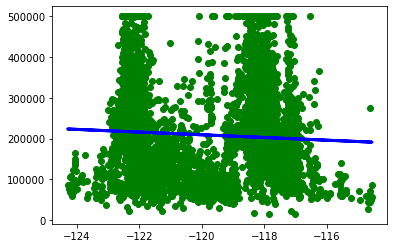

latitude


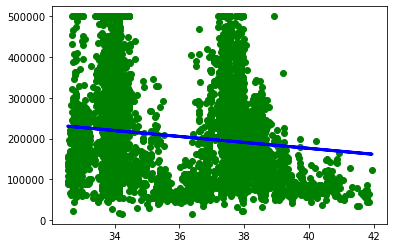

housing_median_age


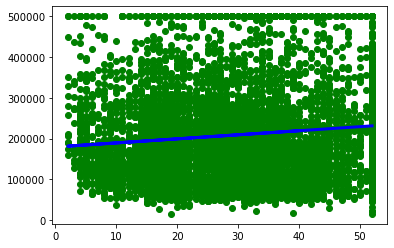

total_rooms


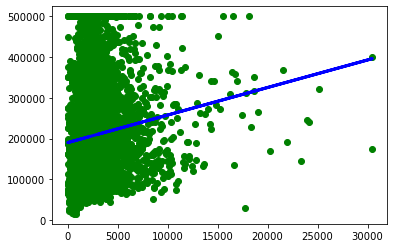

total_bedrooms


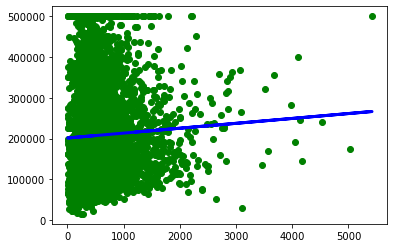

population


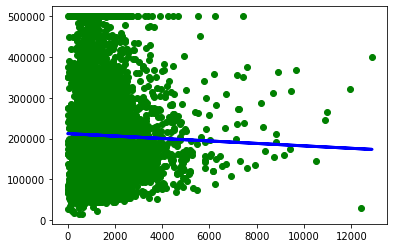

households


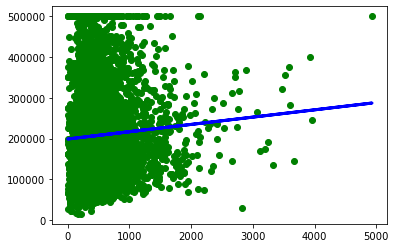

median_income


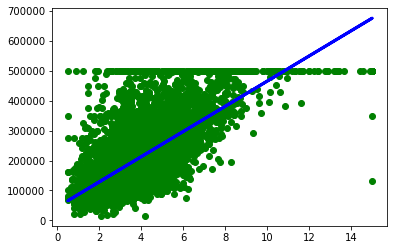

ocean_proximity


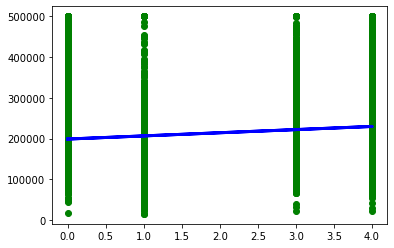

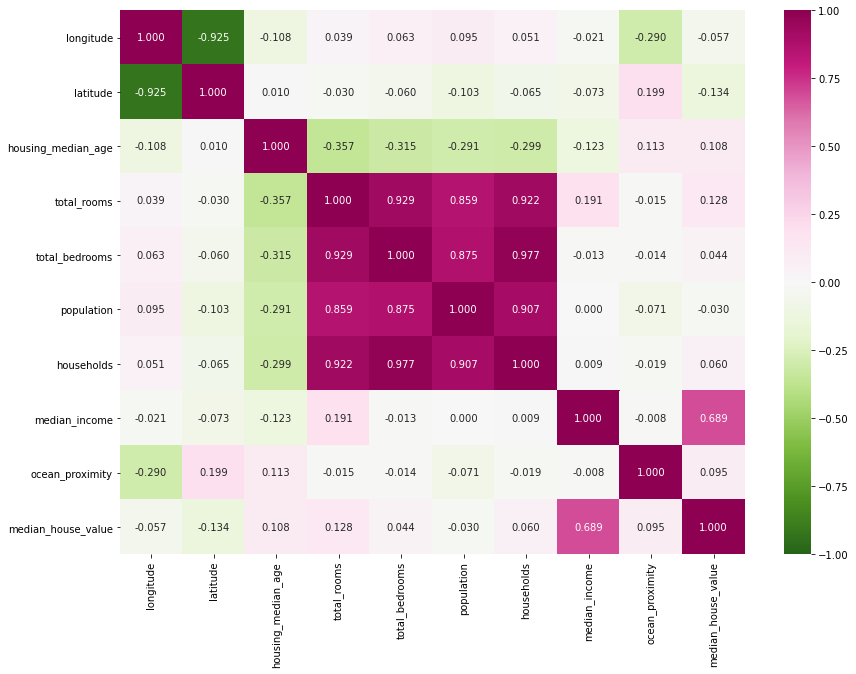

In [612]:
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np

# linear regression of each feature against the target
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

for i in range(len(X_train.columns)) :
    
    print(X_train.columns.values[i])
    one_train = X_train.iloc[:,i:i+1]
    
    #one_train = one_train.values.reshape((-1,1))
    
    regressor.fit(one_train,y_train)   
    
    one_test = X_test.iloc[:,i:i+1]
    #one_test = X_test.iloc[:,i].values.reshape((-1,1))
    y_pred = regressor.predict(one_test)

    plt.scatter(one_test, y_test,  color='green')
    plt.plot(one_test, y_pred, color='blue', linewidth=3)
    plt.show() 
    
    
    
# heatmap

## find correlation in trainging data set    
df_X = pd.DataFrame(X_train)
df_y = pd.DataFrame(y_train)
df_X_y = pd.concat([df_X, df_y], axis=1)

corrs = df_X_y.corr()
plt.figure(figsize = (14, 10))
sbn.heatmap(corrs, annot = True, vmin = -1, vmax = 1, fmt = '.3f', cmap=plt.cm.PiYG_r);

### e. Write down your observations on the above plots to find which features had maximum influence on the target.

In [539]:
#I observed "median_income" features had maximum influence on the target "median_house_value".

### f. What kind of a problem is this? (eg. classification, regression, clustering, etc).

In [540]:
#I think this is a regression problem because median_house_value has no category or group. It is continuous value.

### g. Get the quick description of data using info() and description() functions.

In [541]:
'''
info() function is to print the summary of the dataframe; column, non-null count, dtype
describe()function is to give a nice overview of the main aggregated values over each column; count, mean, std, 
min, 25%, 50%, 75%, max
'''

'\ninfo() function is to print the summary of the dataframe; column, non-null count, dtype\ndescribe()function is to give a nice overview of the main aggregated values over each column; count, mean, std, \nmin, 25%, 50%, 75%, max\n'

### h. Perform min-max normalization on features and target.

In [613]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler  = MinMaxScaler()
scaled_data = pd.DataFrame(min_max_scaler.fit_transform(data), columns=[data.columns.values])
scaled_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.75,0.708247
1,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.75,0.695051
2,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.75,0.672783
3,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.75,0.674638
4,0.209163,0.564293,1.000000,0.023323,0.032899,0.011491,0.031574,0.243921,0.75,0.525155
...,...,...,...,...,...,...,...,...,...,...
20634,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.25,0.130105
20635,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.25,0.128043
20636,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.25,0.159383
20637,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.25,0.143713


### i. Describe rules of NumPy Broadcasting.

In [562]:
'''When operating on two arrays, NumPy compares their shapes element-wise.
It starts with the trailing (i.e. rightmost) dimensions and works its way left.
Two dimensions are compatible when they are equal, or one of them is 1
When either of the dimensions compared is one, the other is used. 
In other words, dimensions with size 1 are stretched or “copied” to match the other.
'''

'When operating on two arrays, NumPy compares their shapes element-wise.\nIt starts with the trailing (i.e. rightmost) dimensions and works its way left.\nTwo dimensions are compatible when they are equal, or one of them is 1\nWhen either of the dimensions compared is one, the other is used. \nIn other words, dimensions with size 1 are stretched or “copied” to match the other.\n'

### j. Describe the purpose of numpy.reshape with a valid example


In [615]:
# Gives a new shape to an array without changing its data.

import numpy as np 
  
array = np.arange(8) 
print("Original array : \n", array) 
  
# shape array with 2 rows and 4 columns 
array = np.arange(8).reshape(2, 4) 
print("\narray reshaped with 2 rows and 4 columns : \n", array) 
  
# shape array with 4 rows and 2 columns 
array = np.arange(8).reshape(4 ,2) 
print("\narray reshaped with 2 rows and 4 columns : \n", array) 
  
# Constructs 3D array 
array = np.arange(8).reshape(2, 2, 2) 
print("\nOriginal array reshaped to 3D : \n", array) 

Original array : 
 [0 1 2 3 4 5 6 7]

array reshaped with 2 rows and 4 columns : 
 [[0 1 2 3]
 [4 5 6 7]]

array reshaped with 2 rows and 4 columns : 
 [[0 1]
 [2 3]
 [4 5]
 [6 7]]

Original array reshaped to 3D : 
 [[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]


## Question 2
Boston housing dataset is a famous dataset widely used for machine learning. In this problem, you will train
a linear regression model that predicts the house price using the Boston housing dataset.

### a. Load Boston house prices dataset. Plot each feature against the target in the training set.  Write down your observations on the above plots to find which features had maximum influence on the target.
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html


0 index feature plot : 


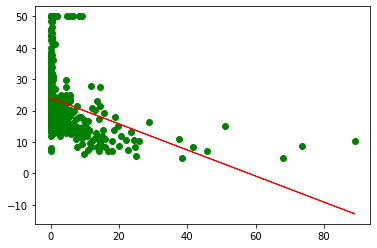

1 index feature plot : 


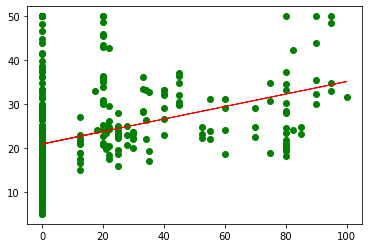

2 index feature plot : 


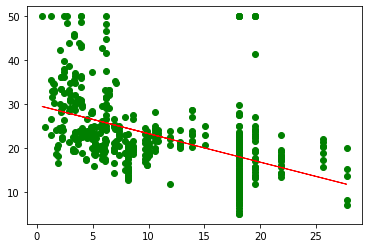

3 index feature plot : 


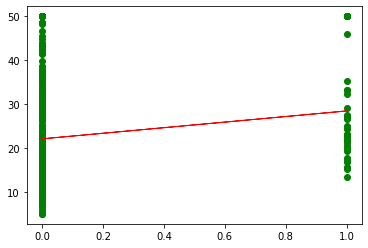

4 index feature plot : 


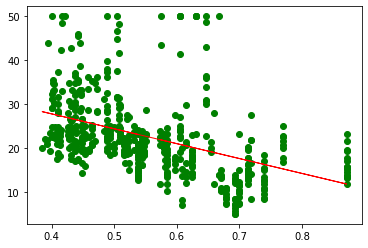

5 index feature plot : 


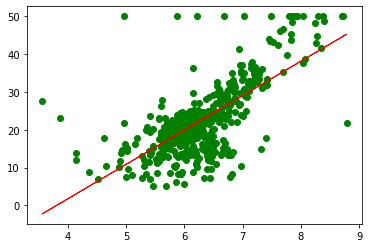

6 index feature plot : 


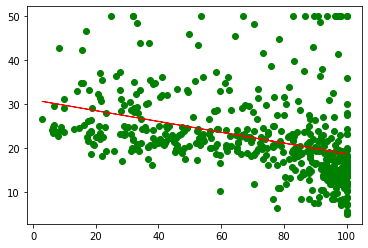

7 index feature plot : 


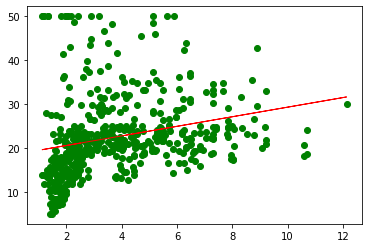

8 index feature plot : 


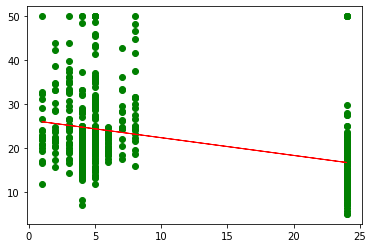

9 index feature plot : 


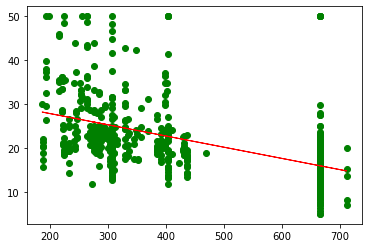

10 index feature plot : 


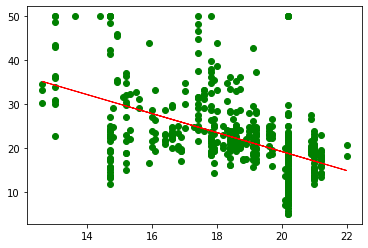

11 index feature plot : 


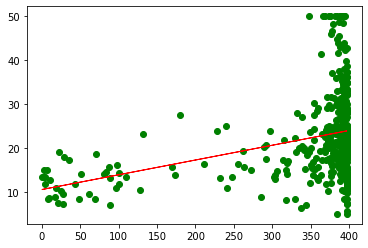

12 index feature plot : 


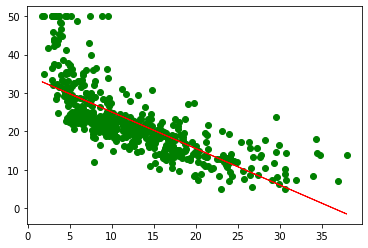

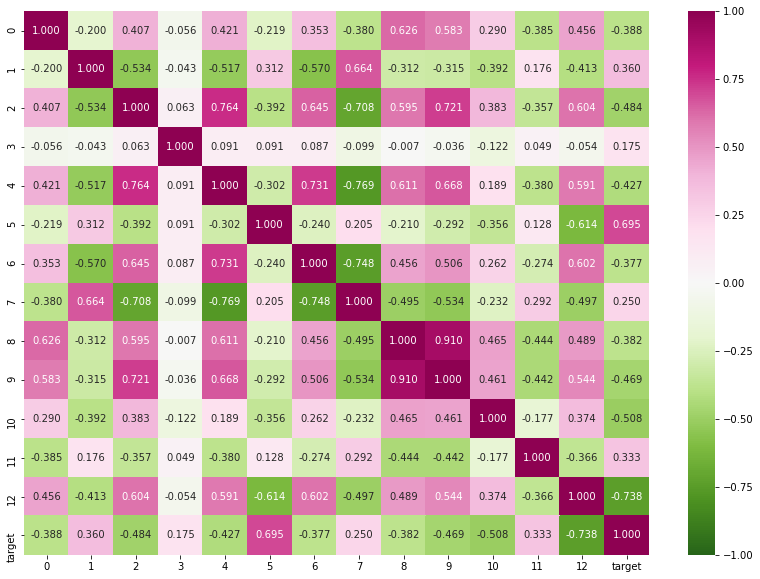

In [616]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

boston_X, boston_y = datasets.load_boston(return_X_y=True)
# boston_X.shape (506,  13)
# boston_y.shape (506, )

for i in range(boston_X.shape[1]) :
    print('{0} index feature plot : '.format(i))
    label_boston_x = boston_X[:, np.newaxis, i]
    
    regr = linear_model.LinearRegression()
    regr.fit(label_boston_x, boston_y)
    boston_y_pred = regr.predict(label_boston_x.reshape(-1,1))
    
    plt.scatter(label_boston_x, boston_y, color='green')
    plt.plot(label_boston_x, boston_y_pred, color='red', linewidth=1)
    plt.show()

## find correlation in trainging data set    
df_bston_X = pd.DataFrame(boston_X)
df_bston_y = pd.DataFrame({'target': boston_y})
boston_X_y = pd.concat([df_bston_X, df_bston_y], axis=1)

corrs = boston_X_y.corr()
plt.figure(figsize = (14, 10))
sbn.heatmap(corrs, annot = True, vmin = -1, vmax = 1, fmt = '.3f', cmap=plt.cm.PiYG_r);

In [574]:
# Before split, I observed index 12 feature would be most likely maximum influenced on target.
# In addition, correlation of 12 feature and target is -0.738, which means negative impact on target.

### b. Store all the features and targets into X and Y respectively. How many instances and how many features does the dataset have? Split the data into 70% training set and 30% test set.

In [617]:
from sklearn.model_selection import train_test_split
boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(boston_X, boston_y, test_size = 0.3, random_state = 1)

print(boston_X_train.shape)
print(boston_X_test.shape)
print(boston_y_train.shape)
print(boston_y_test.shape)

# 354 instance have 13 features in trainning set
# 152 instance have 13 features in test set


(354, 13)
(152, 13)
(354,)
(152,)


### c. Train a linear regression model using  selected feature. 

In [618]:
# train a linear regression model using the maximum influenced feature.
selected_feature_train = boston_X_train[:, np.newaxis, 12]

regr = linear_model.LinearRegression()
regr.fit(selected_feature_train, boston_y_train)


LinearRegression()

### d. Test the model using the test set. Report sklearn.metrics.mean squared error and sklearn.metrics.r2 score between the predicting result and target.

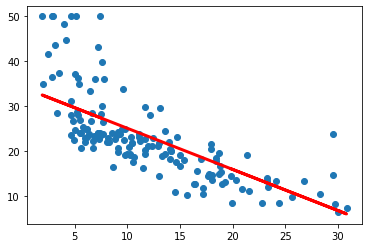

Mean squared error: 42.62
r2_score: 0.53


In [619]:
# test the model using the test set.
selected_feature_test = boston_X_test[:, np.newaxis, 12]
boston_y_pred = regr.predict(selected_feature_test)

# plot a linear regression
plt.scatter(selected_feature_test, boston_y_test)
plt.plot(selected_feature_test, boston_y_pred, color='red', linewidth=3)
plt.show()

from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(boston_y_test, boston_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('r2_score: %.2f' % r2_score(boston_y_test, boston_y_pred))
